# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
from collections import defaultdict
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import roc_curve
from itertools import compress
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

'''
TODO:

1. Try to improve

2. Desing the replace_val for each column

3. Creat preprocess procedure for every class.
'''


%matplotlib inline

rs = 101

 # Task 1. Data Selection and Distribution. 

In [2]:
## Read Data
df = pd.read_csv("CaseStudyData.csv")

/home/chihcheng/python3env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


 ### 1. What is the proportion of cars who can be classified as a “kick”? 

In [3]:
## Exploring the features in this dataset
print("Number of Columns: ", len(df.columns))
print("Columns: ",list(df.columns))

Number of Columns:  31
Columns:  ['PurchaseID', 'PurchaseTimestamp', 'PurchaseDate', 'Auction', 'VehYear', 'Make', 'Color', 'Transmission', 'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size', 'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'MMRCurrentRetailRatio', 'PRIMEUNIT', 'AUCGUART', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'ForSale', 'IsBadBuy']


In [4]:
print("Number of Observations: ", len(df))

Number of Observations:  41476


In [5]:
proportionOfKicks = len(df[df['IsBadBuy'] == 1]) / len(list(df['IsBadBuy']))
print("The proportion of kicks: ", proportionOfKicks)

The proportion of kicks:  0.1294965763333012


### 2. Did you have to fix any data quality problems? Detail them.

In [6]:
#### PREPROCESSING STATEGY
NEW_STATEGY = True
ResamplingMethod = 'ros' #['ros', 'rus']
if NEW_STATEGY:
    print("Using New Preprocessing Strategy")
    using_cat = True
    categorial_cols = ['Auction', 'VehYear', 'Make', 'Color', 'Transmission','WheelTypeID', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName','PRIMEUNIT','AUCGUART','VNST','IsOnlineSale','ForSale' ] # Replaced by the most common 
    interval_cols = ['VehOdo','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','VehBCost','WarrantyCost' ] 
    drop_cols = ['PurchaseID','PurchaseDate','PurchaseTimestamp']
    questionMark_data = ['MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','MMRCurrentRetailRatio']
    replaced_vals = ['?', '#VALUE!']
    if using_cat:
        categorial_cols += questionMark_data
        print("See [MMRCurrentAuctionAveragePrice" +
              "MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice," +
              " MMRCurrentRetailCleanPrice, MMRCurrentRetailRatio] as Categorial Data")
    else: 
        interval_cols += questionMark_data
        print("See [MMRCurrentAuctionAveragePrice" +
              "MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice," +
              " MMRCurrentRetailCleanPrice, MMRCurrentRetailRatio] as Interval Data")
else:
    print("Using Old Preprocessing Strategy")
    drop_cols = ['PurchaseID','PurchaseDate']
    categorial_cols = ['Auction', 'VehYear', 'Make', 'Color', 'Transmission','WheelTypeID', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName','PRIMEUNIT','AUCGUART','VNST','IsOnlineSale','ForSale' ] # Replaced by the most common 
    interval_cols = ['PurchaseTimestamp', 'VehOdo','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','MMRCurrentRetailRatio','VehBCost','WarrantyCost' ] # Replaced by the mean
    replaced_vals = ['?', '#VALUE!']

print("Total null before Replacing: ", df.isnull().sum().sum())

Using New Preprocessing Strategy
See [MMRCurrentAuctionAveragePriceMMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice, MMRCurrentRetailCleanPrice, MMRCurrentRetailRatio] as Categorial Data
Total null before Replacing:  1691


In [7]:
def printColumnInfo():
    
    '''
    Display the information of this Dataframe
    '''
    
    for colName in df.columns:
        print("======================= " + str(colName) + " =======================")
        print("----------------------- FIRST FIVE -----------------------")
        print(df[colName][:5])
        print("----------------------- DESCIRBE -----------------------")
        print(df[colName].describe())
        print("----------------------- COUNTS -----------------------")
        commonList = list(df[colName].value_counts().keys())
        if len(commonList) > 100:
            print("Five Most Common: ", commonList[:5])
        else:
            print("Count List: \n", df[colName].value_counts())
        print("Num of NULL: ", df[colName].isnull().sum())
        for rep in replaced_vals:
            print("Number of "+str(rep)+" : " + str(len(df[df[colName] == rep])))
printColumnInfo()

/home/chihcheng/python3env/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


======================= PurchaseID =======================
----------------------- FIRST FIVE -----------------------
0    0
1    1
2    2
3    3
4    4
Name: PurchaseID, dtype: int64
----------------------- DESCIRBE -----------------------
count    41476.000000
mean     20737.500000
std      11973.234219
min          0.000000
25%      10368.750000
50%      20737.500000
75%      31106.250000
max      41475.000000
Name: PurchaseID, dtype: float64
----------------------- COUNTS -----------------------
Five Most Common:  [2047, 11567, 15693, 13644, 3403]
Num of NULL:  0
Number of ? : 0
Number of #VALUE! : 0
======================= PurchaseTimestamp =======================
----------------------- FIRST FIVE -----------------------
0    1253232000
1    1253232000
2    1253232000
3    1253232000
4    1253232000
Name: PurchaseTimestamp, dtype: int64
----------------------- DESCIRBE -----------------------
count    4.147600e+04
mean     1.262260e+09
std      1.796895e+07
min      1.231114e+09


Num of NULL:  44
Number of ? : 3
Number of #VALUE! : 0
======================= Size =======================
----------------------- FIRST FIVE -----------------------
0     MEDIUM
1     MEDIUM
2     MEDIUM
3    COMPACT
4     MEDIUM
Name: Size, dtype: object
----------------------- DESCIRBE -----------------------
count      41432
unique        13
top       MEDIUM
freq       17540
Name: Size, dtype: object
----------------------- COUNTS -----------------------
Count List: 
 MEDIUM         17540
LARGE           4968
MEDIUM SUV      4569
COMPACT         4035
VAN             3367
LARGE TRUCK     1897
SMALL SUV       1332
SPECIALTY        998
CROSSOVER        974
LARGE SUV        830
SMALL TRUCK      494
SPORTS           425
?                  3
Name: Size, dtype: int64
Num of NULL:  44
Number of ? : 3
Number of #VALUE! : 0
======================= TopThreeAmericanName =======================
----------------------- FIRST FIVE -----------------------
0    CHRYSLER
1    CHRYSLER
2    CHRYSLER

In [8]:
if NEW_STATEGY:

    class filling_method():
        MOST_COMMON = "MOST_COMMON"
        MEAN = "MEAN"
        CERTAIN_VALUE = "CERTAIN_VALUE"

    def replaceFunc(colName):
        for replaced, target in preprocessStrategy[colName]['replace_pairs']:
            df[colName].replace(replaced, target, inplace=True)

    def removeOutlier(colName):  # FOR THE INTERVAL ONLY
        global df
        df = df[df[colName] < df[colName].quantile(0.999)]

    def replacingValueCol(colName):
        for replaced in preprocessStrategy[colName]['replaced_vals']:
            print("In the Column: " + str(colName) + " : " + str(len(
                df[df[colName] == replaced])) + ", " + str(replaced) + "have been replaced by null")
            # Replacing the null in this process #Inplacing for saving the memory
            df[colName].replace(replaced, float('nan'), inplace=True)

    def loweringCol(colName):
        df[colName] = df[colName].str.lower()

    def fillingTheNullValue(colName):  # method can be ["MEAN", "MOST_COMMON"]
        if preprocessStrategy[colName]['filling_method'] == filling_method.MEAN:
            df[colName] = df[colName].astype('float')
            df[colName].fillna(df[colName].astype(
                'float').mean(), inplace=True)
        elif preprocessStrategy[colName]['filling_method'] == filling_method.MOST_COMMON:
            df[colName] = df[colName].astype('category')
            df[colName].fillna(df[colName].astype(
                'category').describe()['top'], inplace=True)
        elif preprocessStrategy[colName]['filling_method'] == filling_method.CERTAIN_VALUE:
            df[colName] = df[colName].astype('category')
            df[colName] = df[colName].cat.add_categories(
                [preprocessStrategy[colName]['filling_value']])
            df[colName].fillna(preprocessStrategy[colName]
                               ['filling_value'], inplace=True)

    def filterOutRareValue(colName):

        def checkingKeepValue(v, savingValues):
            if v in savingValues:
                return v
            return "LESS_FREQ"

        k = [v for v in df[colName].value_counts().values if v >
             preprocessStrategy[colName]['min_freq']]
        savingValues = df[colName].value_counts().keys()[:len(k)]

        df[colName] = [checkingKeepValue(v, savingValues) for v in df[colName]]

    def changeToType(colName):
        df[colName] = df[colName].astype(
            preprocessStrategy[colName]['changeToType'])

    def newData_prep(df):
        '''
        For Preprocessing through the whole dictionary
        '''
        df.drop(drop_cols, axis=1, inplace=True)

        for colName in df.columns:  # df.columns:

            print("Preprocess the col: " + colName)

            for stra in preprocessStrategy[colName]['strategies']:
                if not stra:
                    continue
                print(stra)
                stra(colName)

        if not using_cat:
            df['MMRCurrentRetailRatio'] = df['MMRCurrentRetailAveragePrice'] / \
                (df['MMRCurrentRetailCleanPrice']+1e-8)  # Prvent divided by 0

        return df

    preprocessStrategy = defaultdict(dict)

    preprocessStrategy['Auction'] = {
        "strategies":
            [
                replacingValueCol,
                loweringCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],
        "filling_method": filling_method.MOST_COMMON
    }

    preprocessStrategy['VehYear'] = {
        "strategies":
            [
                fillingTheNullValue,
            ],
        "filling_method": filling_method.CERTAIN_VALUE,
        "filling_value": "UNKNOWN_VALUE"
    }

    preprocessStrategy['Make'] = {
        "strategies":
            [
                loweringCol,
                fillingTheNullValue,
            ],
        "filling_method": filling_method.MOST_COMMON
    }

    preprocessStrategy['Color'] = {
        "strategies":
            [
                loweringCol,
                replacingValueCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],
        "filling_method": filling_method.MOST_COMMON
    }

    preprocessStrategy['Transmission'] = {
        "strategies":
            [
                loweringCol,
                replacingValueCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],
        "filling_method": filling_method.MOST_COMMON
    }

    preprocessStrategy['WheelTypeID'] = {
        "strategies":
            [
                fillingTheNullValue,
            ],
        "filling_method": filling_method.MOST_COMMON
    }

    preprocessStrategy['WheelType'] = {
        "strategies":
            [
                loweringCol,
                fillingTheNullValue,
            ],
        "filling_method": filling_method.MOST_COMMON
    }

    preprocessStrategy['VehOdo'] = {
        "strategies":
            [
                fillingTheNullValue,
            ],
        "filling_method": filling_method.MEAN
    }

    preprocessStrategy['Nationality'] = {  # Should I merge USA with AMERICAN?
        "strategies":
            [
                replaceFunc,
                loweringCol,
                replacingValueCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],
        "filling_method": filling_method.MOST_COMMON,
        "replace_pairs": [("USA", "AMERICAN")]

    }

    preprocessStrategy['Size'] = {
        "strategies":
            [
                loweringCol,
                replacingValueCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],
        "filling_method": filling_method.MOST_COMMON

    }

    preprocessStrategy['TopThreeAmericanName'] = {
        "strategies":
            [
                loweringCol,
                replacingValueCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],
        "filling_method": filling_method.MOST_COMMON
    }

    preprocessStrategy['TopThreeAmericanName'] = {
        "strategies":
            [
                loweringCol,
                replacingValueCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],
        "filling_method": filling_method.MOST_COMMON
    }

    preprocessStrategy['MMRAcquisitionAuctionAveragePrice'] = {
        "strategies":
            [
                replacingValueCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],
        "filling_method": filling_method.MEAN
    }

    preprocessStrategy['MMRAcquisitionAuctionCleanPrice'] = {
        "strategies":
            [
                replacingValueCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],
        "filling_method": filling_method.MEAN
    }

    preprocessStrategy['MMRAcquisitionRetailAveragePrice'] = {
        "strategies":
            [
                replacingValueCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],
        "filling_method": filling_method.MEAN
    }

    preprocessStrategy['MMRAcquisitonRetailCleanPrice'] = {
        "strategies":
            [
                replacingValueCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],
        "filling_method": filling_method.MEAN
    }

    ###############################################################

    int_stra = {
        "strategies":
            [
                replacingValueCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?', '#VALUE!'],  # GOT 184 '?'
        "filling_method": filling_method.MEAN,
    }

    cat_stra = {  # HOW DO WE DEAL WITH ? in this column
        "strategies":
            [
                filterOutRareValue,
                fillingTheNullValue,
            ],
        #     "replaced_vals": ['?'], # GOT 184 '?'
        "filling_method": filling_method.CERTAIN_VALUE,
        "filling_value": 'NULL',
        "min_freq": 50
    }

    preprocessStrategy['MMRCurrentAuctionAveragePrice'] \
        = preprocessStrategy['MMRCurrentAuctionCleanPrice'] \
        = preprocessStrategy['MMRCurrentRetailAveragePrice'] \
        = preprocessStrategy['MMRCurrentRetailCleanPrice'] \
        = preprocessStrategy['MMRCurrentRetailRatio'] \
        = cat_stra if using_cat else int_stra

    ###############################################################

    preprocessStrategy['PRIMEUNIT'] = {  # HOW DO WE DEAL WITH ? in this column
        "strategies":
            [
                loweringCol,
                fillingTheNullValue,
            ],
        #     "replaced_vals": ['?'], # GOT 184 '?'
        "filling_method": filling_method.CERTAIN_VALUE,
        "filling_value": 'NULL',
    }

    preprocessStrategy['AUCGUART'] = {  # HOW DO WE DEAL WITH ? in this column
        "strategies":
            [
                loweringCol,
                fillingTheNullValue,
            ],
        #     "replaced_vals": ['?'], # GOT 184 '?'
        "filling_method": filling_method.CERTAIN_VALUE,
        "filling_value": 'NULL',
    }

    preprocessStrategy['VNST'] = {  # HOW DO WE DEAL WITH ? in this column
        "strategies":
            [
                loweringCol,
                fillingTheNullValue,
            ],
        #     "replaced_vals": ['?'], # GOT 184 '?'
        "filling_method": filling_method.CERTAIN_VALUE,
        "filling_value": 'NULL',
    }

    preprocessStrategy['VehBCost'] = {  # HOW DO WE DEAL WITH ? in this column
        "strategies":
            [
                replacingValueCol,

                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],  # GOT 184 '?'
        "filling_method": filling_method.MEAN
    }

    preprocessStrategy['IsOnlineSale'] = {  # HOW DO WE DEAL WITH ? in this column
        "strategies":
            [
                replacingValueCol,
                changeToType,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?', 2.0, 4.0],  # GOT 184 '?'
        "filling_method": filling_method.MOST_COMMON,
        "changeToType": 'float'
    }

    preprocessStrategy['WarrantyCost'] = {  # HOW DO WE DEAL WITH ? in this column
        "strategies":
            [
                fillingTheNullValue,
            ],
        "replaced_vals": ['?'],  # GOT 184 '?'
        "filling_method": filling_method.MEAN,
    }

    preprocessStrategy['ForSale'] = {  # HOW DO WE DEAL WITH ? in this column
        "strategies":
            [
                loweringCol,
                replacingValueCol,
                fillingTheNullValue,
            ],
        "replaced_vals": ['?', 0],  # GOT 184 '?'
        "filling_method": filling_method.MOST_COMMON,
    }

    # HOW DO WE DEAL WITH ? in this column
    preprocessStrategy['IsBadBuy'] = {"strategies": [None]}

    newData_prep(df)


else:

    def data_prep(df):
        '''
        For Preprocessing the Data (OLD_METHOD)
        '''

        # Check the replaced values are not in the dataset

        for colName in df.columns:

            if colName in categorial_cols:

                if colName == "IsOnlineSale":
                    df[colName] = df[colName].astype(
                        'float').astype('category')
                    df[colName].fillna(df[colName].astype(
                        'category').describe()['top'], inplace=True)

                # Try to lower the data if the data type is string
                try:
                    df[colName] = df[colName].str.lower()
                except:
                    print(colName, " can't be lowered")

                for replaced in replaced_vals:
                    print("In the Column: " + str(colName) + ": " +
                          str(len(df[df[colName] == replaced])) + " -> " + str(replaced))
                    df[colName].replace(replaced, float('nan'), inplace=True)

                df[colName] = df[colName].astype('category')

                # Replacing the null by the most common category
                df[colName].fillna(df[colName].astype(
                    'category').describe()['top'], inplace=True)

            if colName in interval_cols:

                if colName == "MMRCurrentRetailRatio":  # Dealing with this calculated value at the last
                    continue

                for replaced in replaced_vals:
                    print("In the Column: " + str(colName) + ": " +
                          str(len(df[df[colName] == replaced])) + " -> " + str(replaced))
                    df[colName].replace(replaced, float('nan'), inplace=True)

                df[colName] = df[colName].astype('float')

                # Removing outlier
                df = df[df[colName] < df[colName].quantile(0.999)]

                # Replacing the null by the mean
                df[colName].fillna(df[colName].astype(
                    'float').mean(), inplace=True)

        df['MMRCurrentRetailRatio'] = df['MMRCurrentRetailAveragePrice'] / \
            (df['MMRCurrentRetailCleanPrice']+1e-8)  # Prvent divided by 0

        df.drop(drop_cols, axis=1, inplace=True)

        return df

    df = data_prep(df)


Preprocess the col: Auction
<function replacingValueCol at 0x7f35438138c8>
In the Column: Auction : 0, ?have been replaced by null
<function loweringCol at 0x7f3542ee6ae8>
<function fillingTheNullValue at 0x7f3542ee6730>
Preprocess the col: VehYear
<function fillingTheNullValue at 0x7f3542ee6730>
Preprocess the col: Make
<function loweringCol at 0x7f3542ee6ae8>
<function fillingTheNullValue at 0x7f3542ee6730>
Preprocess the col: Color
<function loweringCol at 0x7f3542ee6ae8>
<function replacingValueCol at 0x7f35438138c8>
In the Column: Color : 6, ?have been replaced by null
<function fillingTheNullValue at 0x7f3542ee6730>
Preprocess the col: Transmission
<function loweringCol at 0x7f3542ee6ae8>
<function replacingValueCol at 0x7f35438138c8>
In the Column: Transmission : 6, ?have been replaced by null
<function fillingTheNullValue at 0x7f3542ee6730>
Preprocess the col: WheelTypeID
<function fillingTheNullValue at 0x7f3542ee6730>
Preprocess the col: WheelType
<function loweringCol at 0x7

### 3. Can you identify any clear patterns by initial exploration of the data using histogram or box plot?

In [ ]:
def plotAllCols (df):
    for colName in df.columns:
        plt.figure(figsize=(20,10))
        if colName in categorial_cols:
            ### if it's categorial column, plot hist diagram 
            sns.countplot(x=colName, data = df, hue="IsBadBuy")
        elif colName in interval_cols:
            ### if it's interval column, plot box diagram
            sns.boxplot(x="IsBadBuy", y=colName, data = df )

/home/chihcheng/python3env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/chihcheng/python3env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


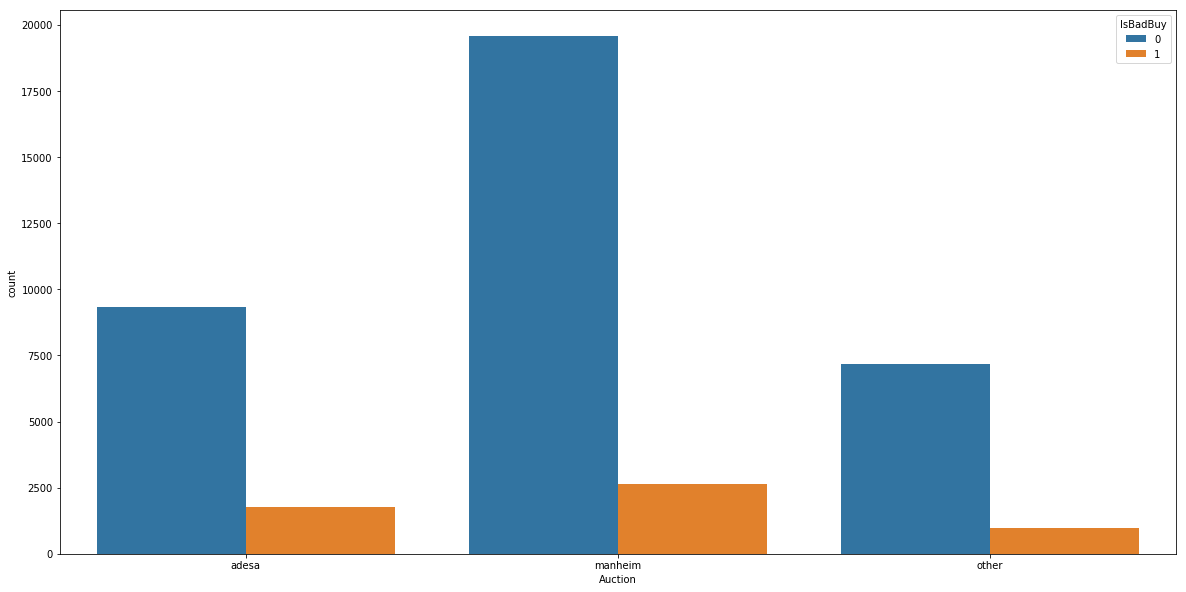

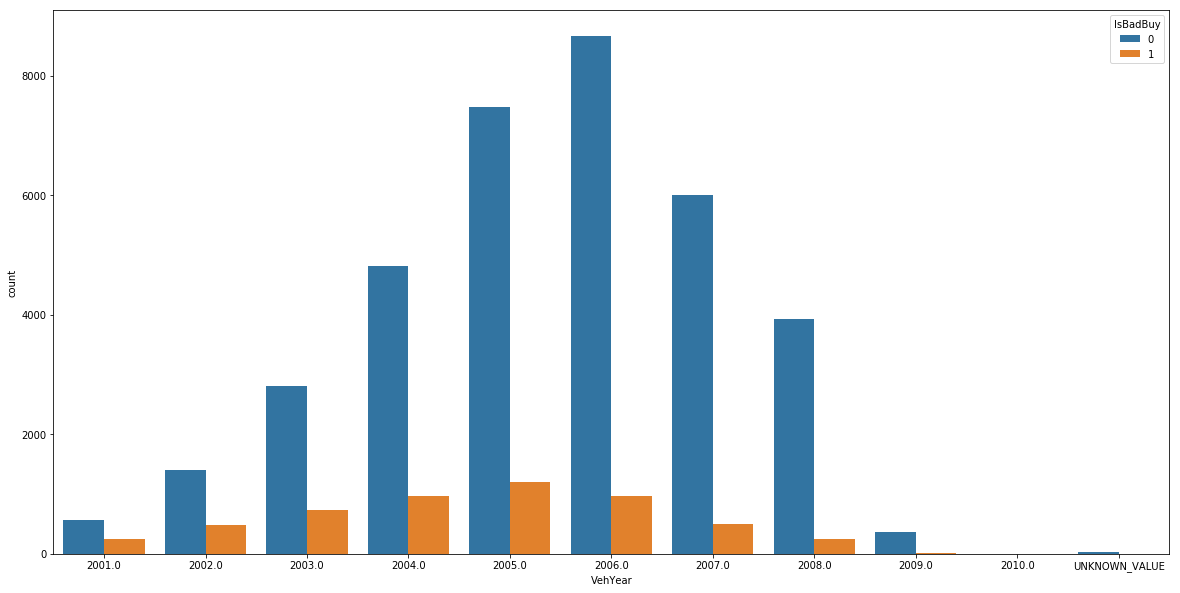

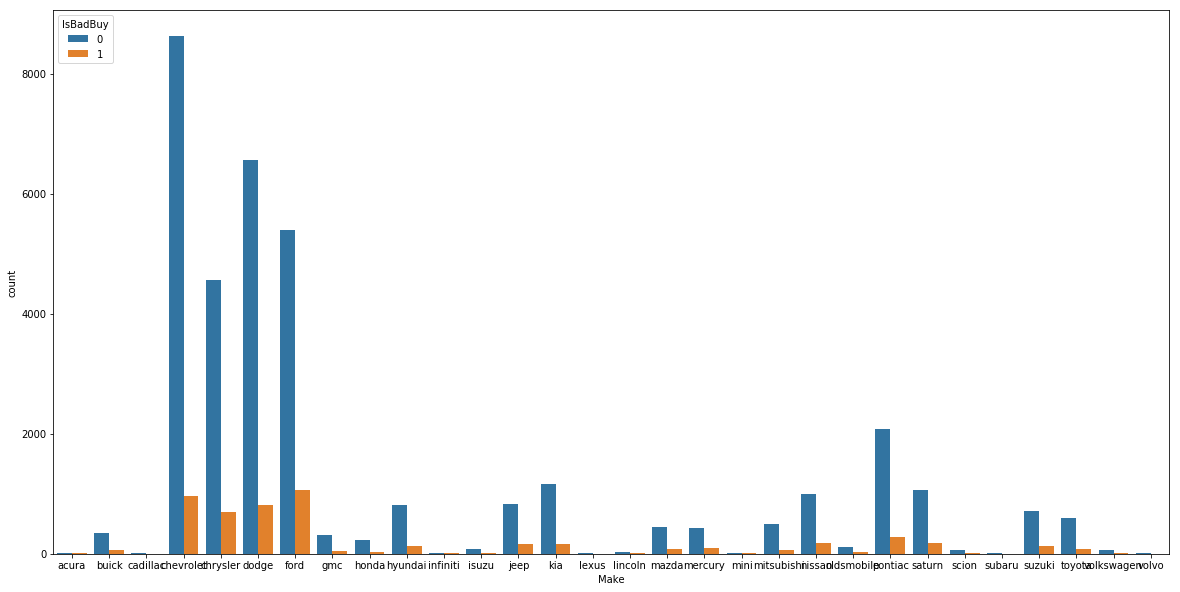

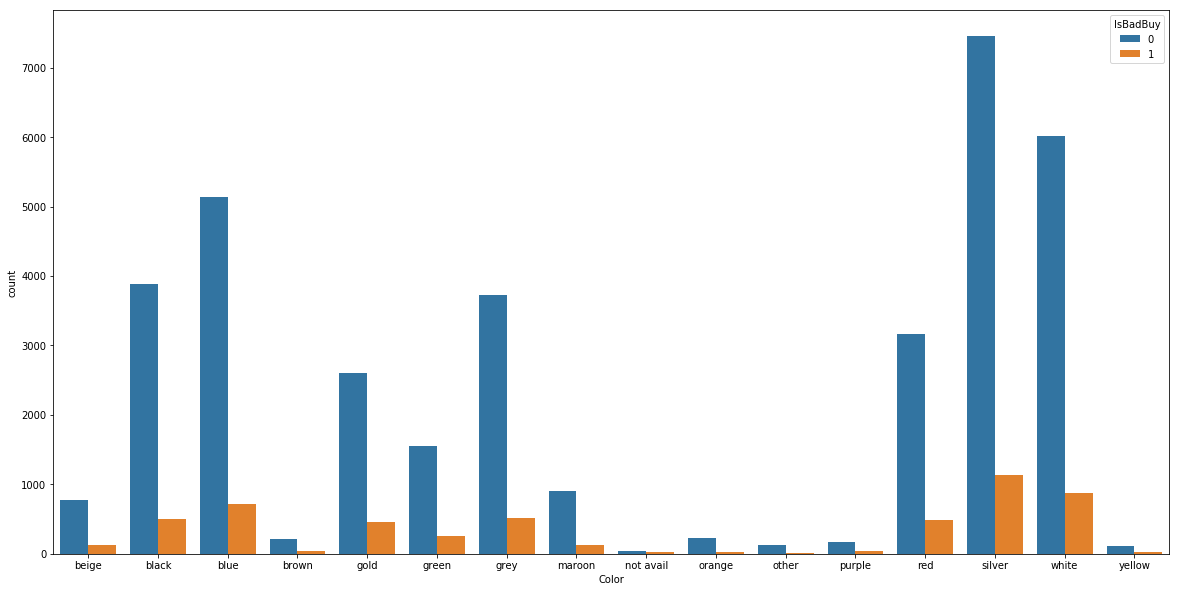

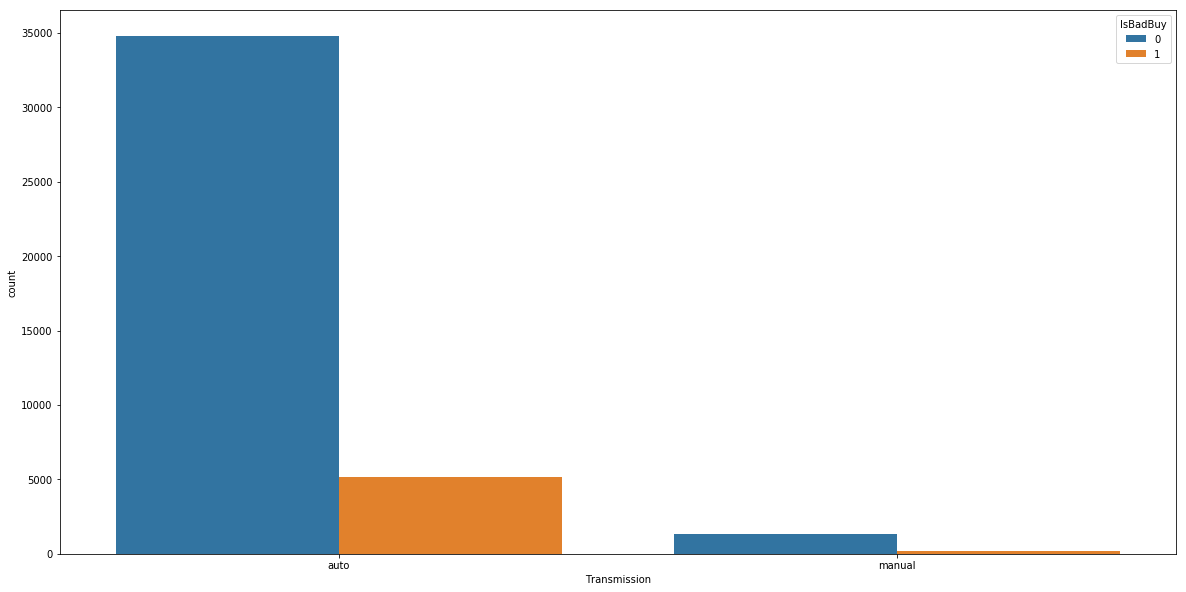

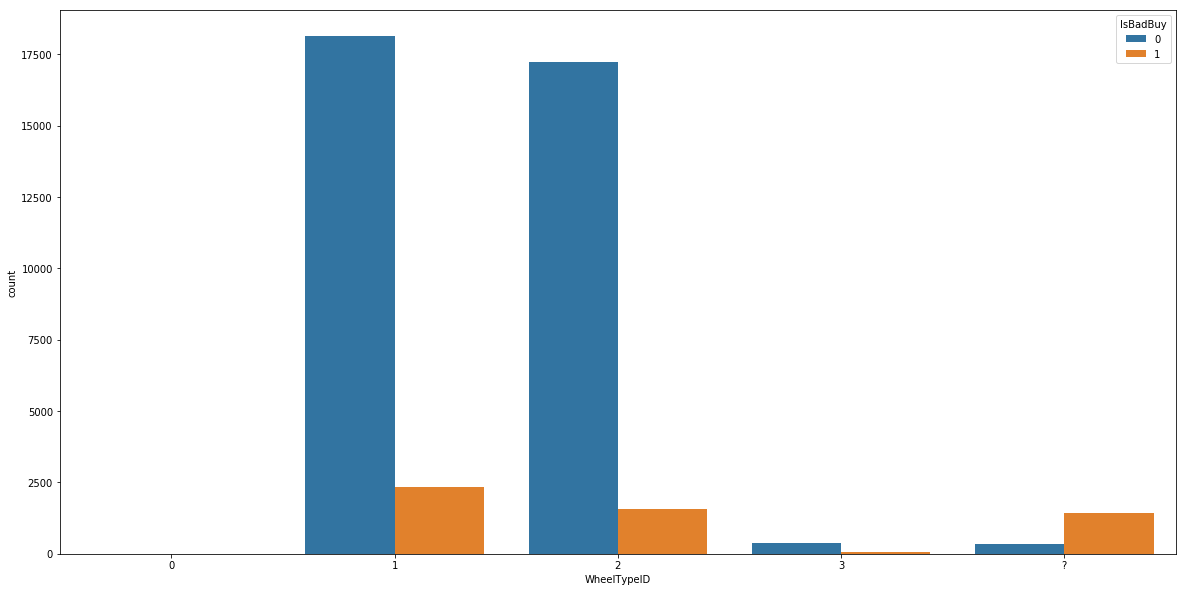

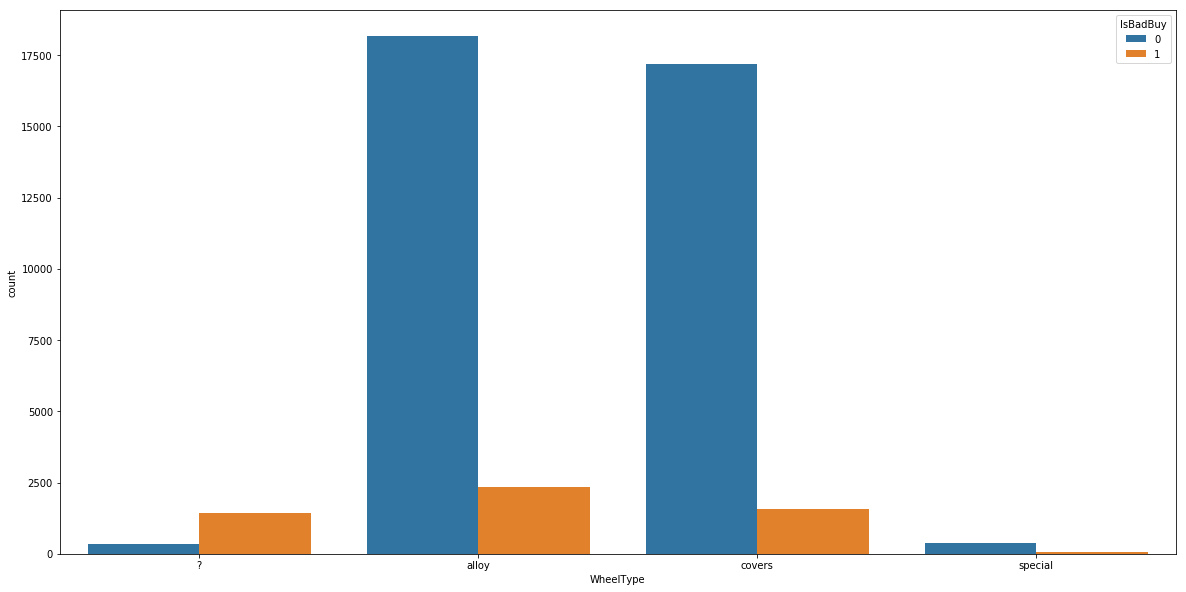

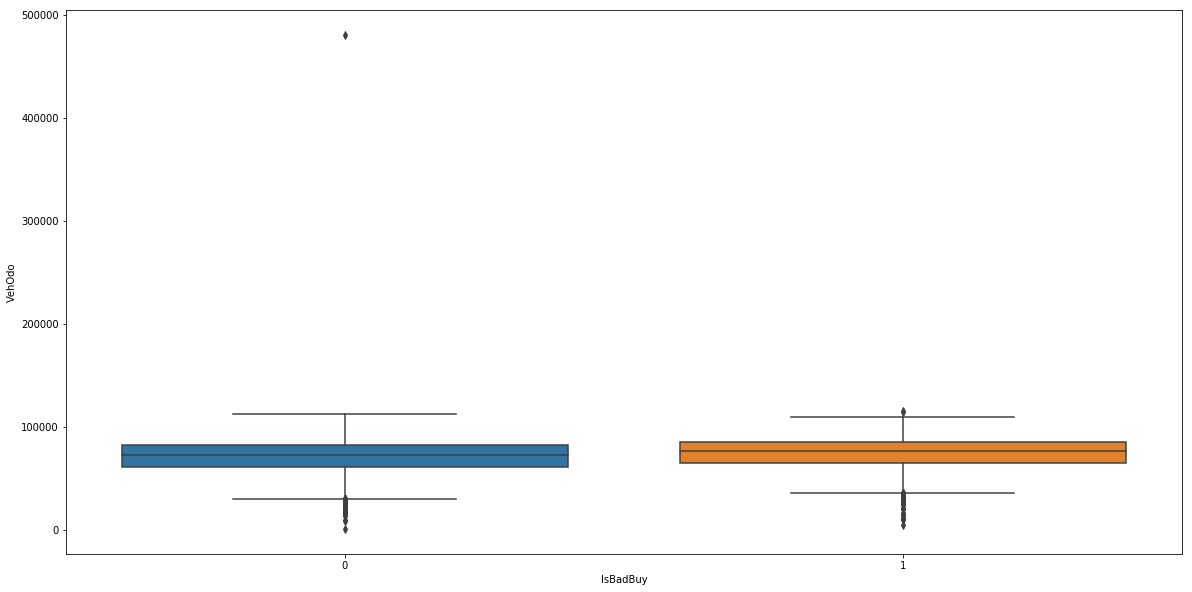

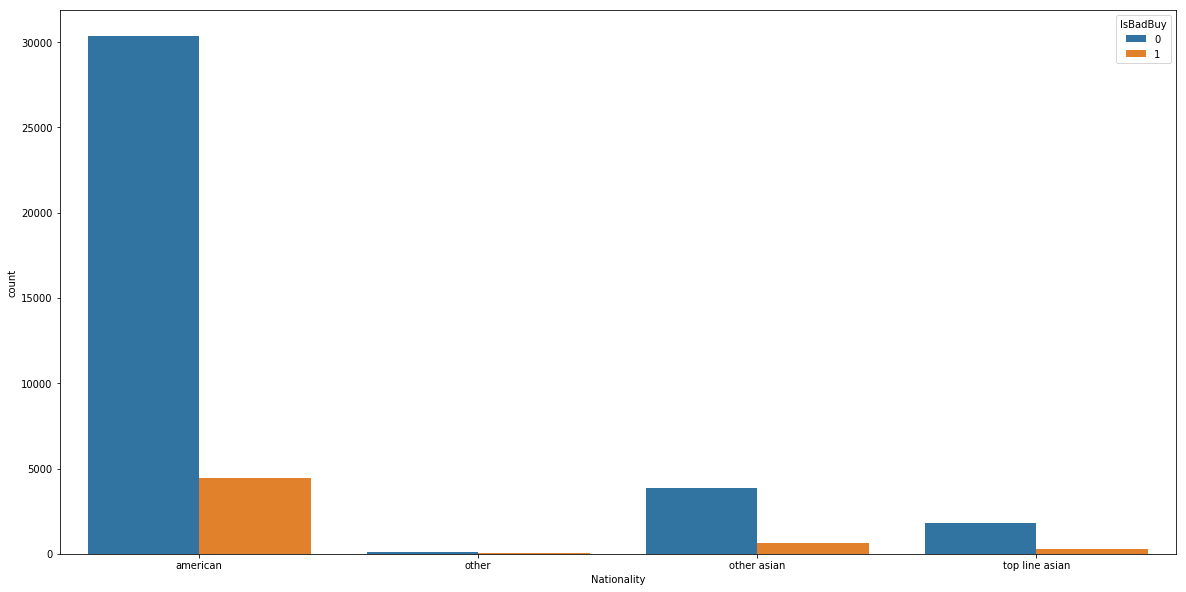

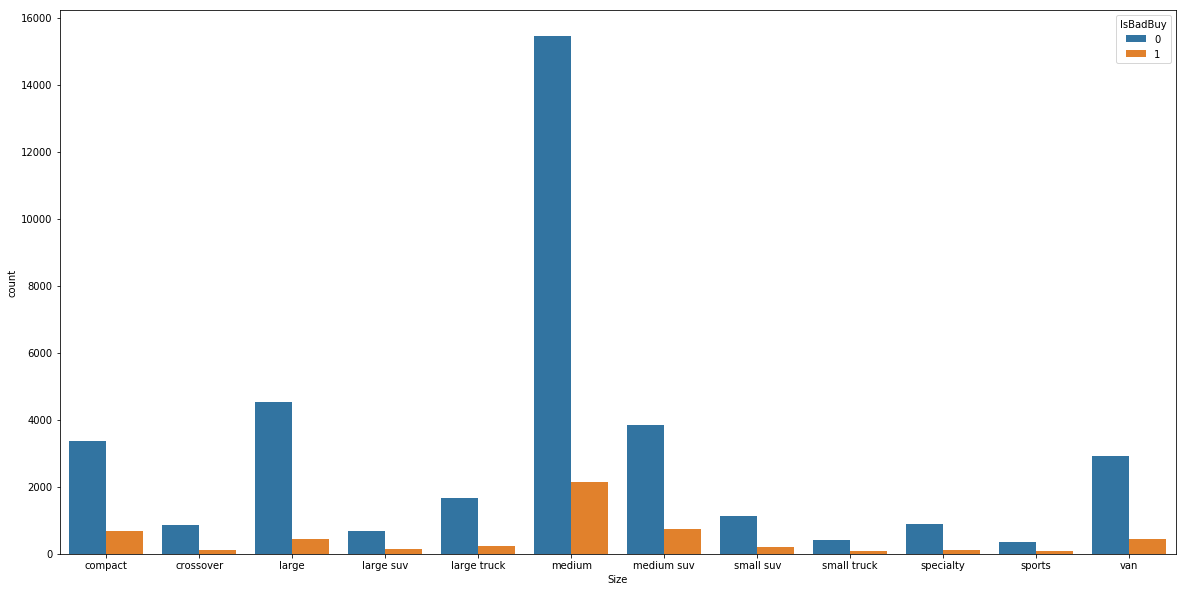

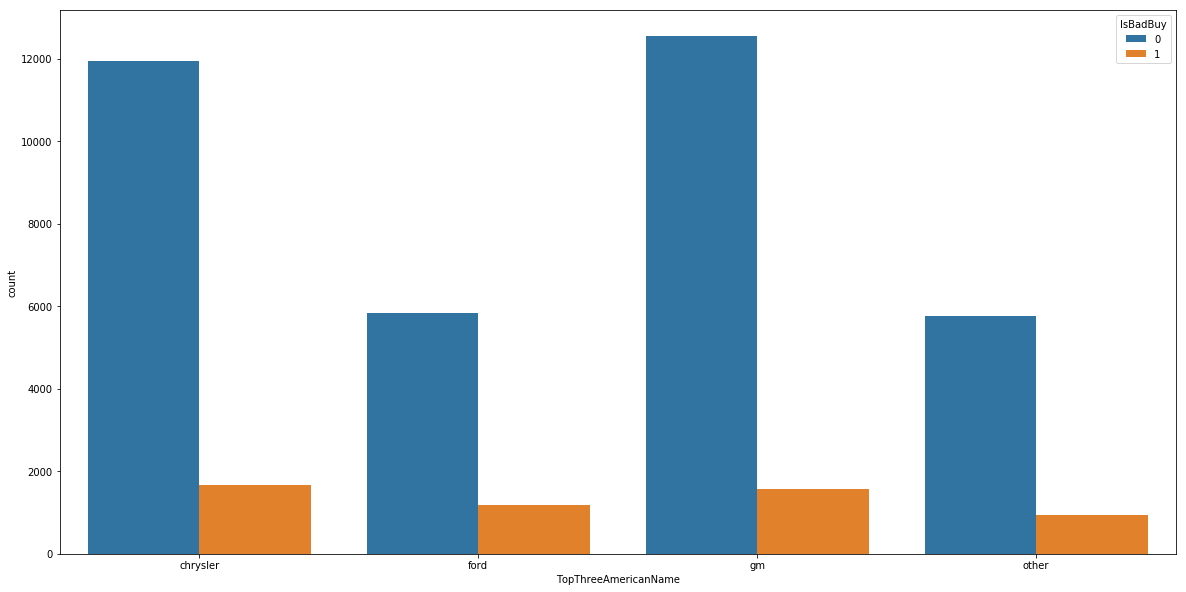

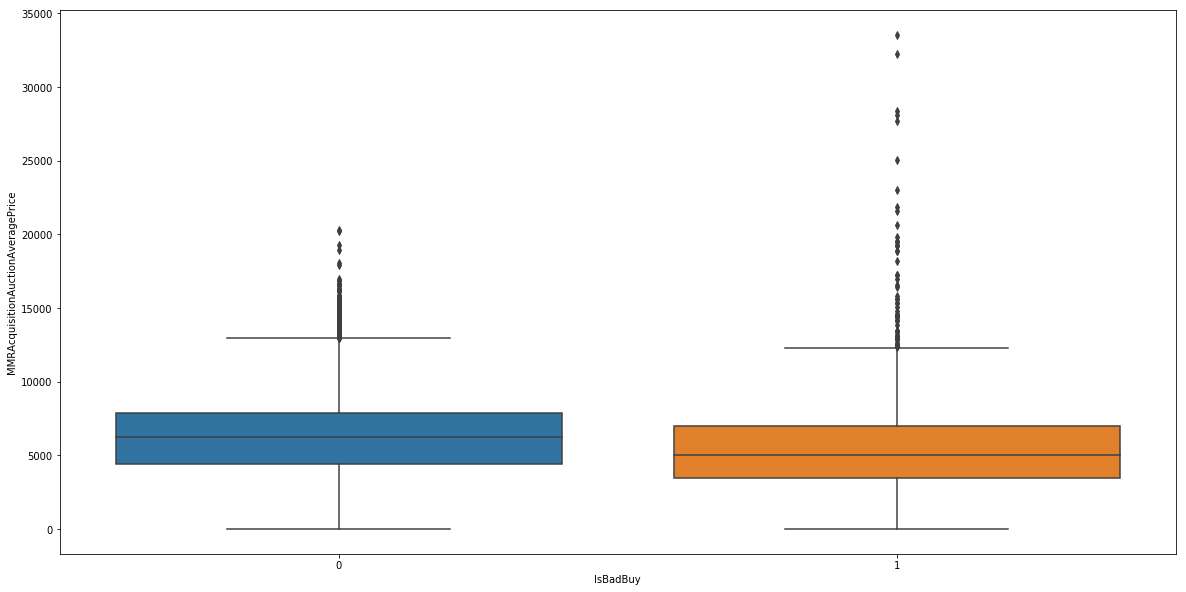

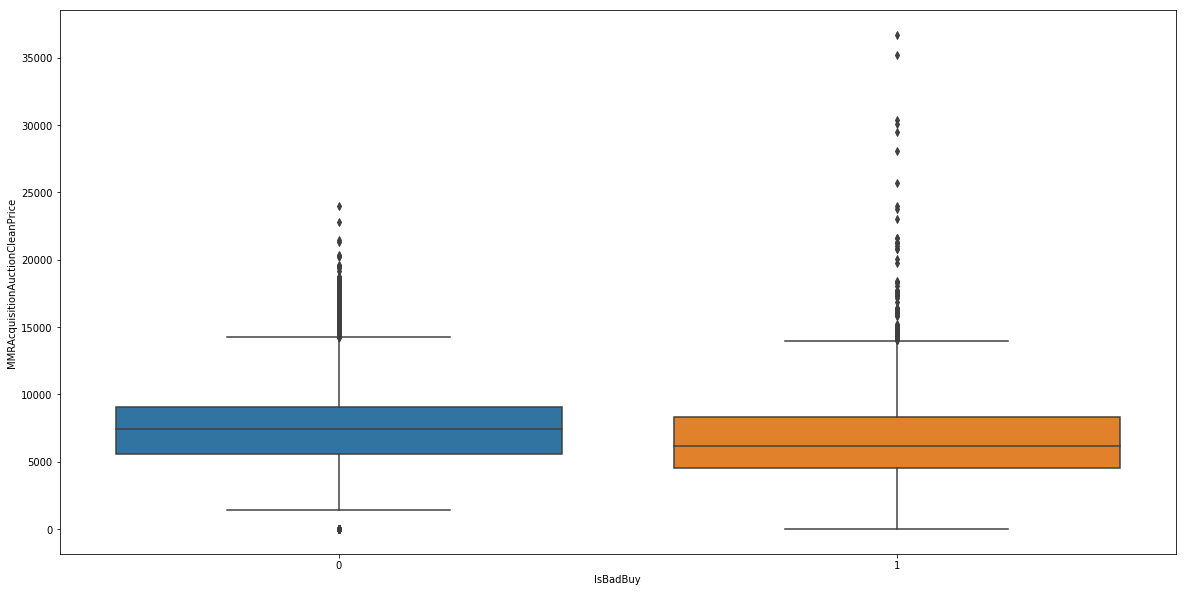

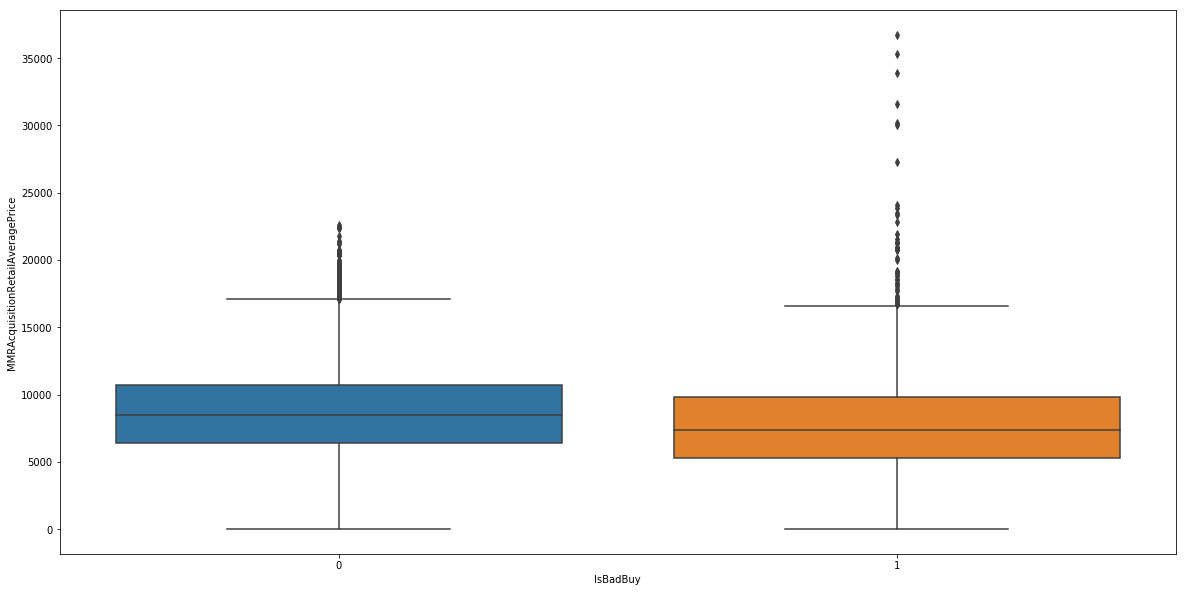

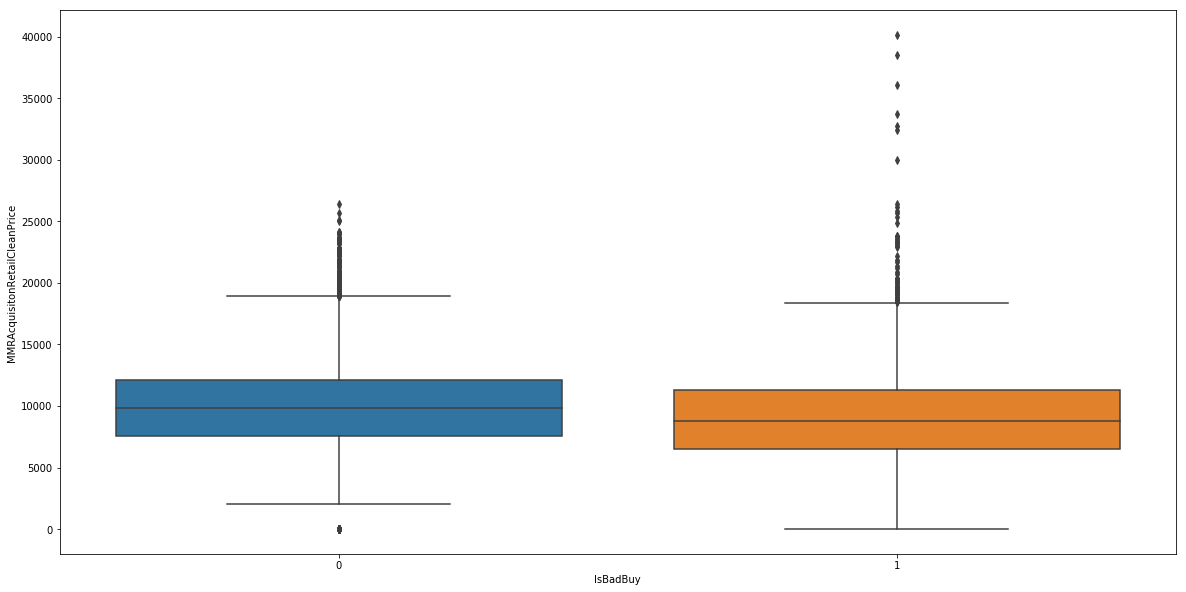

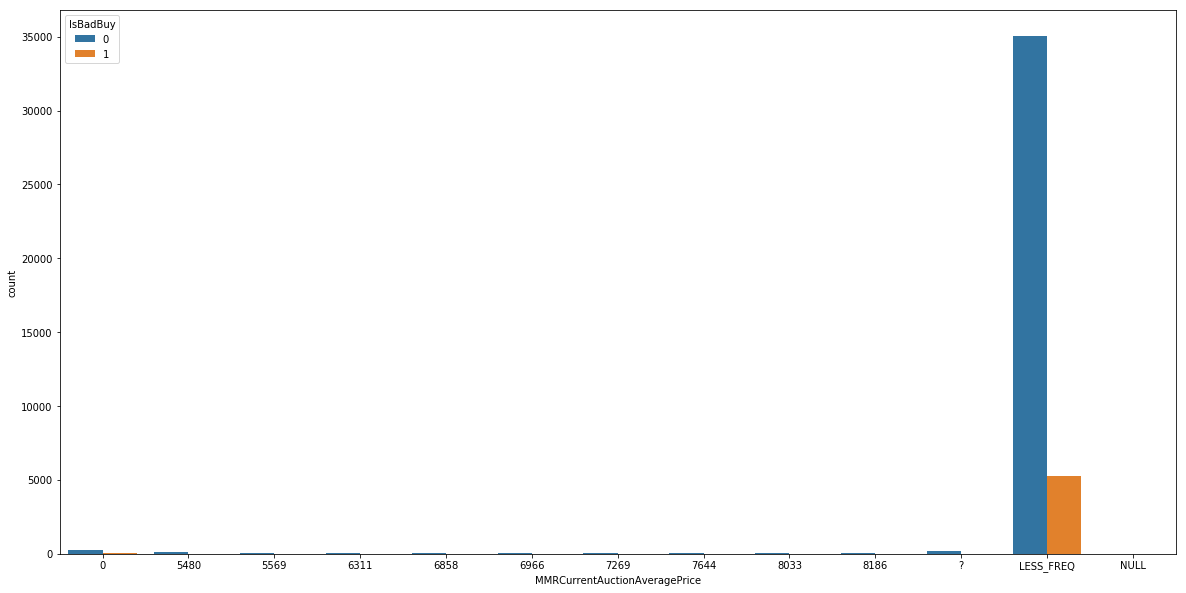

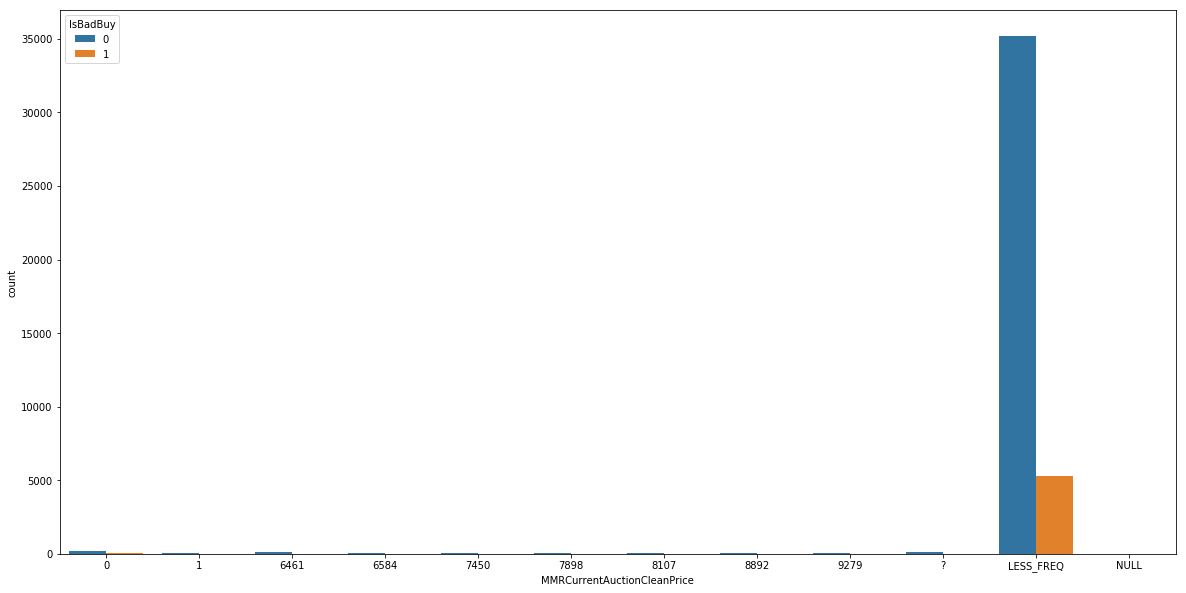

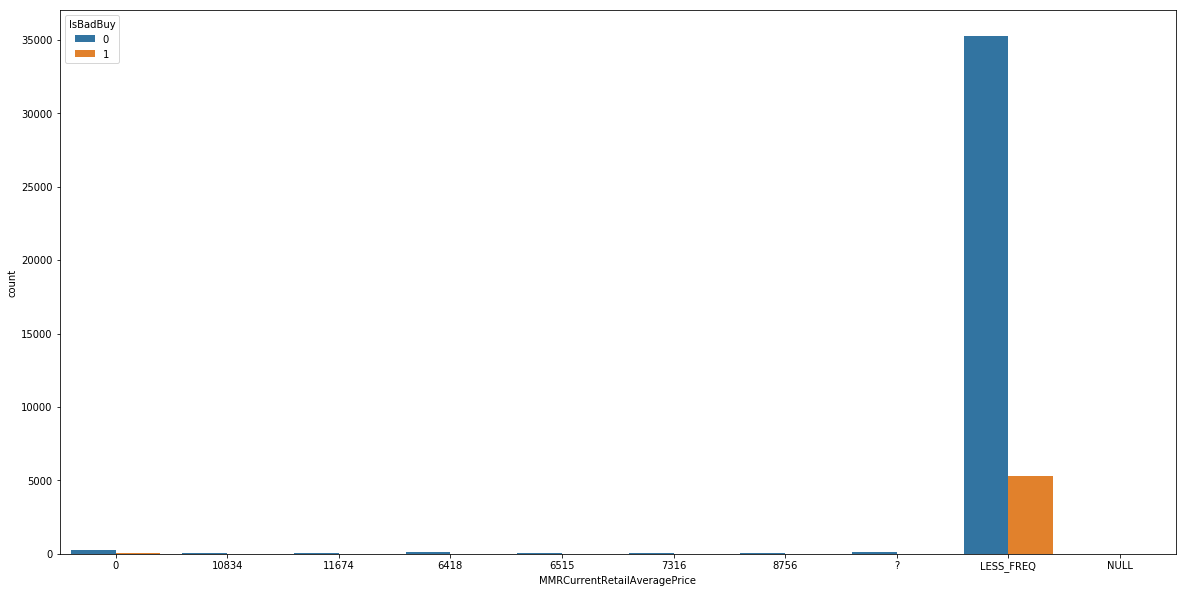

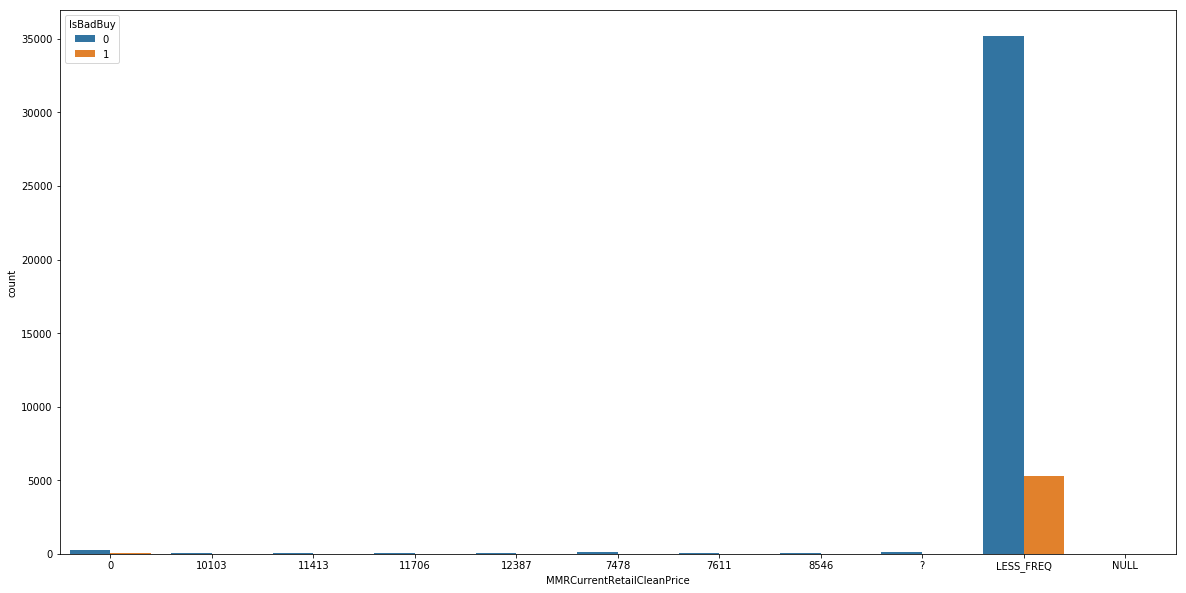

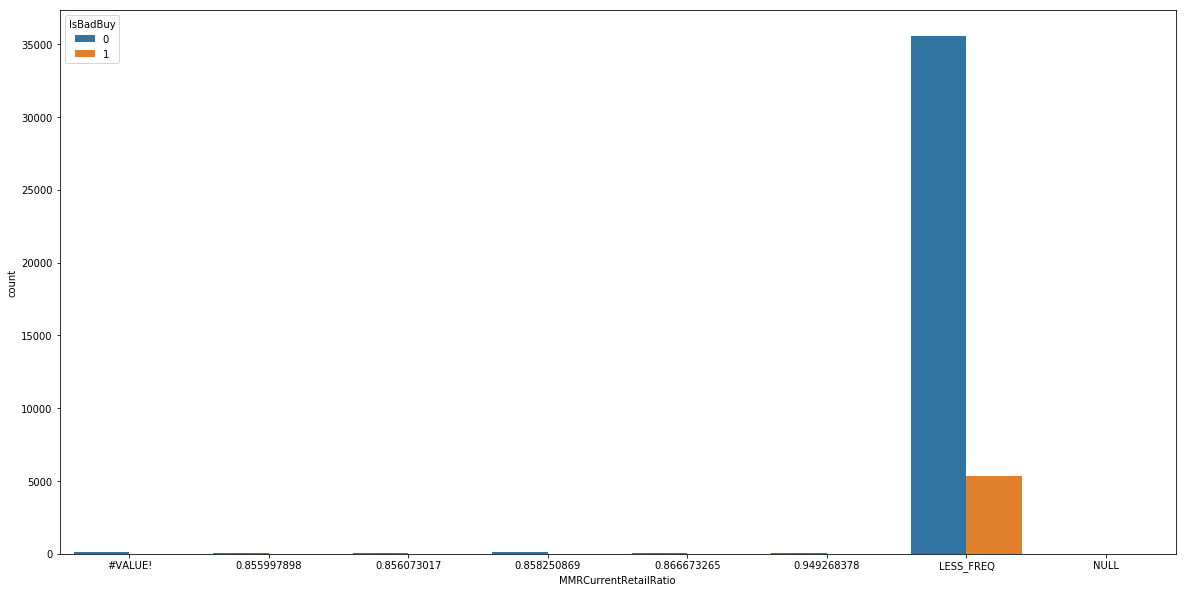

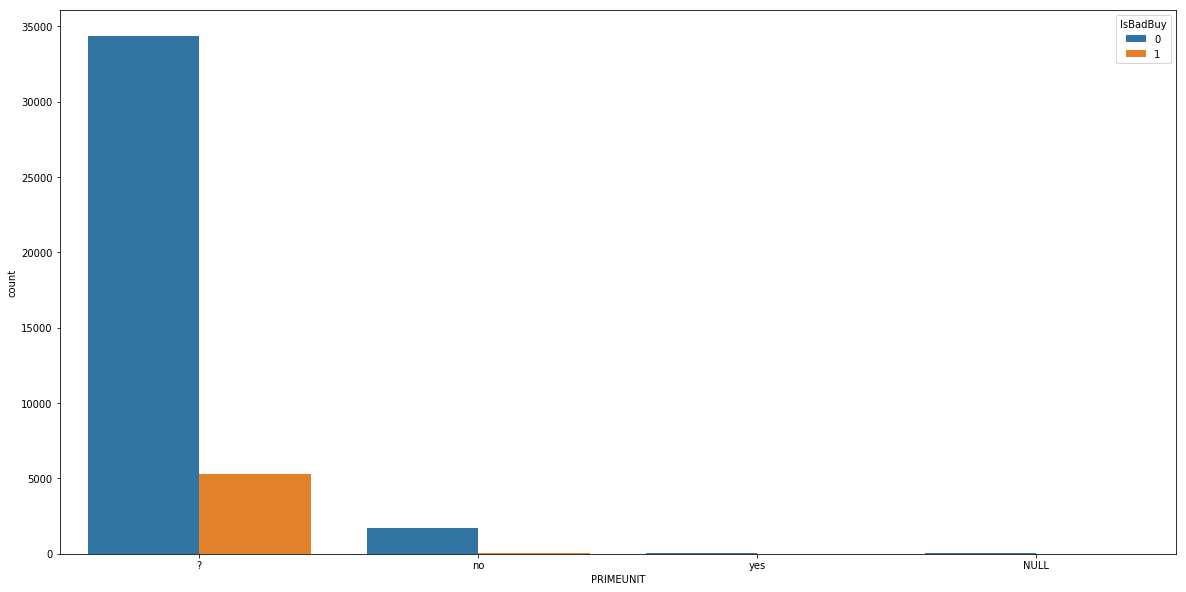

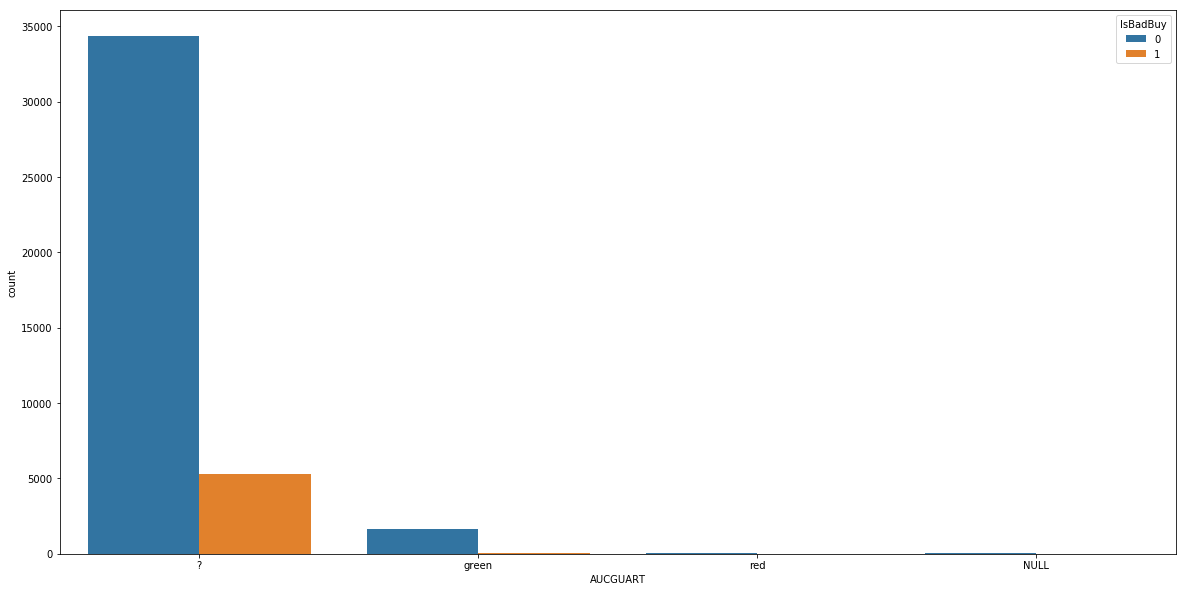

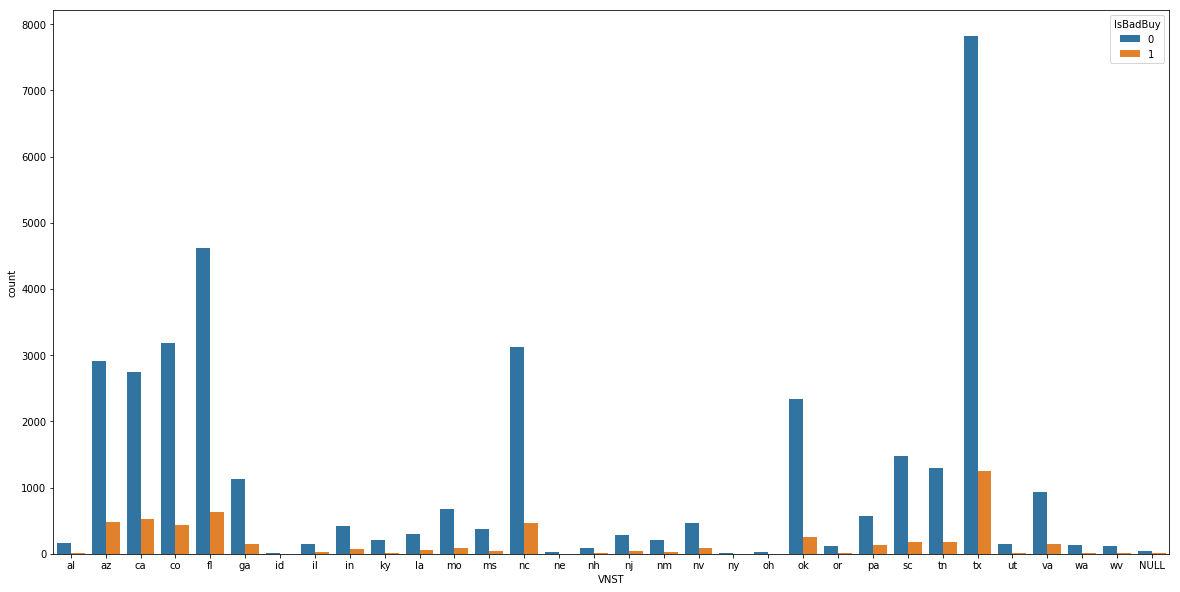

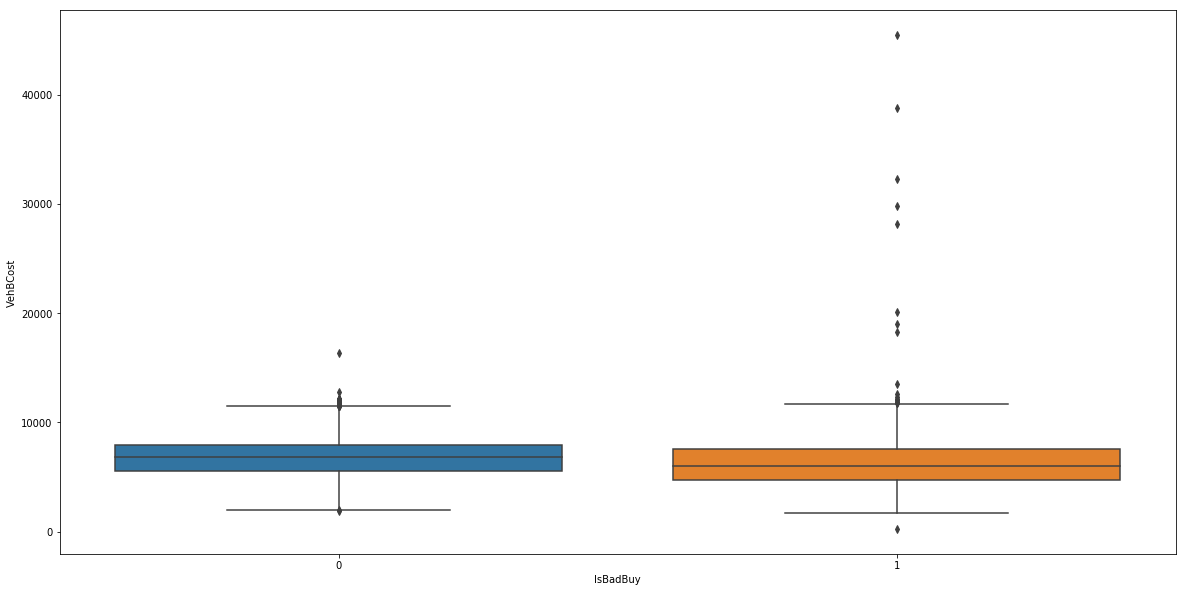

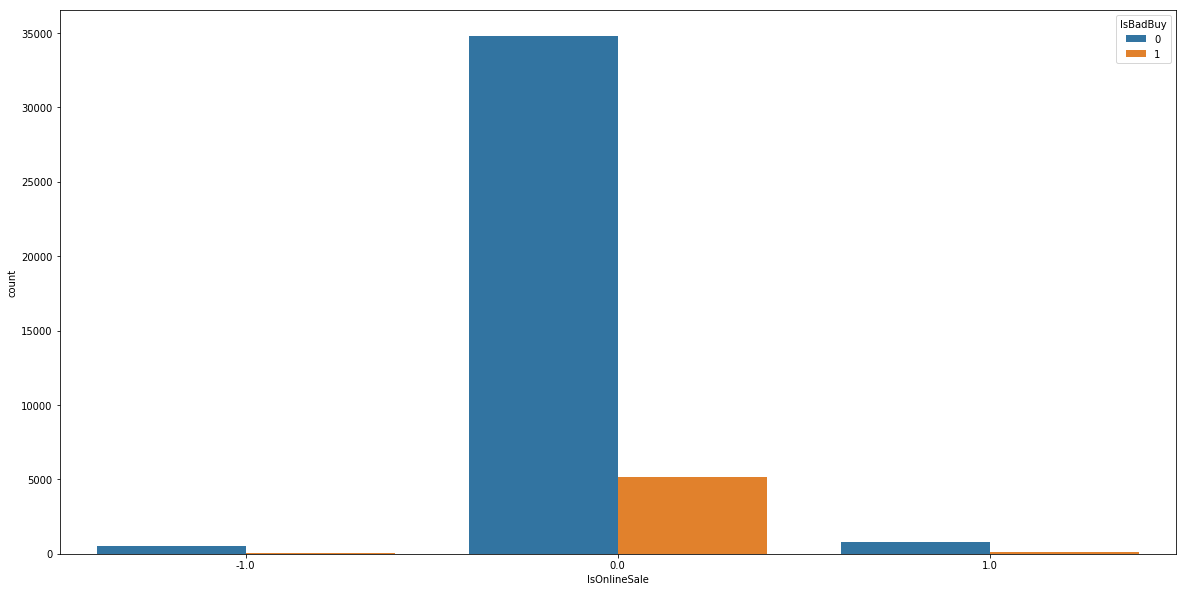

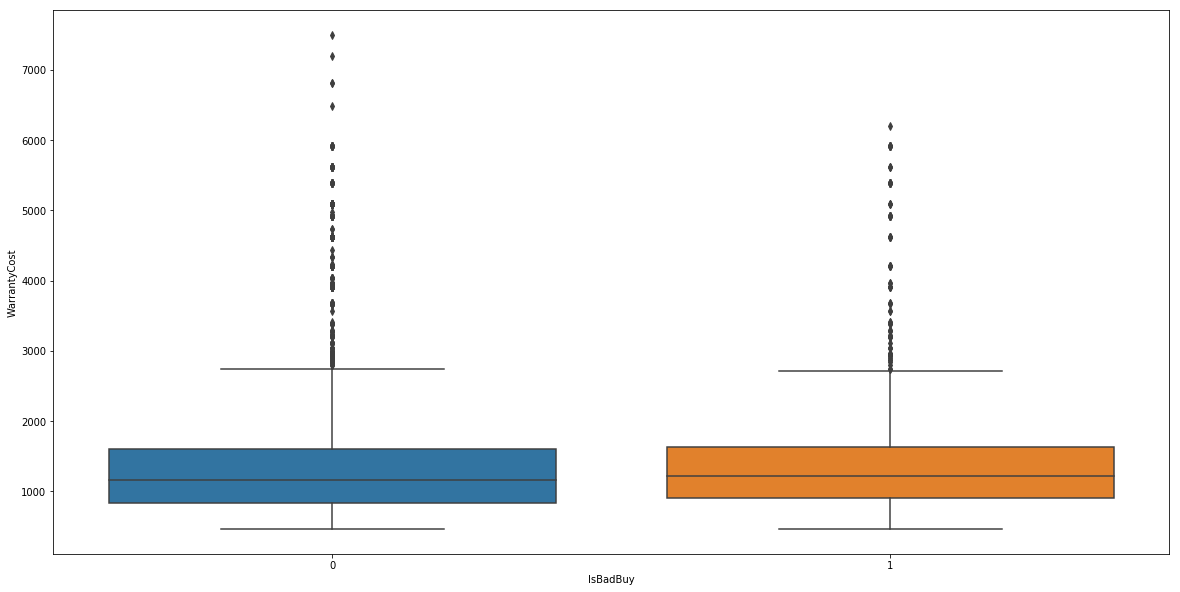

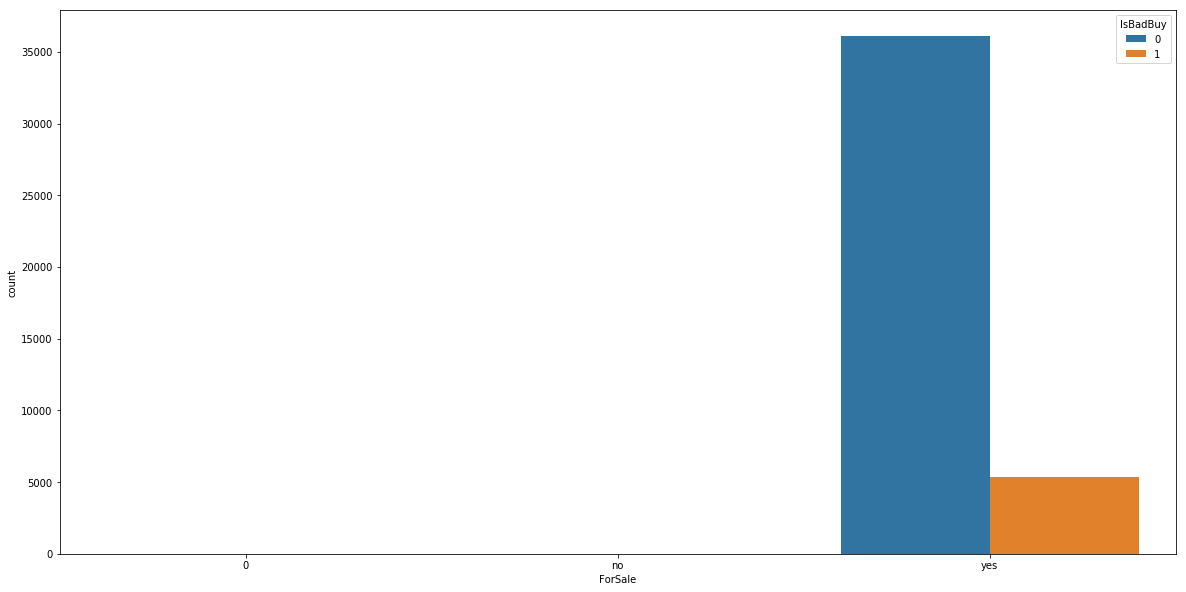

<Figure size 1440x720 with 0 Axes>

In [ ]:
plotAllCols(df)

### 4. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice

### 5. What distribution scheme did you use? What data partitioning allocation did you set? Explain your selection. 

In [ ]:
# Change to the dummy 

df = pd.get_dummies(df)

feature_names = df.drop("IsBadBuy", axis=1).columns


### Split to the training and test set. 
#  The test size is 3%

# y = df['IsBadBuy']
# X = df.drop(['IsBadBuy'], axis=1)
# X_mat = X.as_matrix()

# X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

X_train, X_test, y_train, y_test = train_test_split(df.drop("IsBadBuy", axis=1), df['IsBadBuy'], test_size=0.3, stratify=df['IsBadBuy'], random_state=rs)

if ResamplingMethod == 'ros':
    print("Using ROS Resmapling")
    ros = RandomOverSampler(random_state=rs)
    X_train, y_train = ros.fit_resample(X_train, y_train)
elif  ResamplingMethod == 'rus':
    print("Using RUS Resmapling")
    rus = RandomUnderSampler(random_state=rs)
    X_train, y_train = rus.fit_resample(X_train, y_train)
else:
    print("No Resampling Method Used")

Using ROS Resmapling


In [ ]:
print("Number of Training: ", len(X_train))
print("Number of Test: ", len(X_test) )

Number of Training:  50546
Number of Test:  12443


# Task 2. Predictive Modeling Using Decision Trees 

## 1. Python: Build a decision tree using the default setting. 

In [ ]:
def printLRTopImportant(model, top = 5):
    
    coef = model.coef_[0]
    indices = np.argsort(np.absolute(coef))
    indices = np.flip(indices, axis=0)
    indices = indices[:top]
    for i in indices:
        print(feature_names[i], ':', coef[i])

def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    for i in indices:
        print(feature_names[i], ':', importances[i])

def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file


In [ ]:
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

### a. What is the classification accuracy on training and test datasets?

In [ ]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred) ## Confusion Matrix on the TestSet

Train accuracy: 0.9994856170616864
Test accuracy: 0.8256047576950896
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     10832
           1       0.33      0.33      0.33      1611

   micro avg       0.83      0.83      0.83     12443
   macro avg       0.61      0.61      0.61     12443
weighted avg       0.83      0.83      0.83     12443



### b. What is the size of tree (i.e. number of nodes)?

In [ ]:
print("Number of nodes: ",model.tree_.node_count)

Number of nodes:  7451


### c. How many leaves are in the tree that is selected based on the validation dataset?

### d. Which variable is used for the first split? What are the competing splits for this first split? 

In [ ]:
visualize_decision_tree(model, df.drop("IsBadBuy", axis=1).columns, "Tree_Struct.png")

### e. What are the 5 important variables in building the tree? 

In [ ]:
analyse_feature_importance(model, df.drop("IsBadBuy", axis=1).columns, 5)

WheelTypeID_? : 0.13551426074337208
VehBCost : 0.12697398520218173
VehOdo : 0.09322697324736888
MMRAcquisitionAuctionCleanPrice : 0.0728830956066675
MMRAcquisitionRetailAveragePrice : 0.06240815240105831


### f. Report if you see any evidence of model overfitting. 

### g. Did changing the default setting (i.e., only focus on changing the setting of the number of splits to create a node) help improving the model? Answer the above questions on the best performing tree.

## 2. Python: Build another decision tree tuned with GridSearchCV

array([[9742, 1090],
       [1080,  531]])

In [ ]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': list(range(1, 6000, 1000)) + [None],
          'splitter': ['best', 'random'],
          'min_samples_leaf': range(1,  4),
          'min_samples_split': [2, 0.5, 0.3],
          'max_features':['auto','sqrt','log2', None],
          'class_weight':['balanced', None]
         }

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

### a. What is the classification accuracy on training and test datasets?

In [ ]:
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

dt_model = cv.best_estimator_

### b. What is the size of tree (i.e. number of nodes)? Is the size different from the maximal tree or the tree in the previous step? Why?

In [ ]:
print("Number of nodes: ", cv.best_estimator_.tree_.node_count)

### c. How many leaves are in the tree that is selected based on the validation dataset?

### d. Which variable is used for the first split? What are the competing splits for this first split? 

In [ ]:
visualize_decision_tree(cv.best_estimator_, df.drop("IsBadBuy", axis=1).columns, "Tree_Struct_CV.png")

### e. What are the 5 important variables in building the tree? 

In [ ]:
analyse_feature_importance(cv.best_estimator_, df.drop("IsBadBuy", axis=1).columns, 5)

### f. Report if you see any evidence of model overfitting. 

### g. What are the parameters used? Explain your choices.

## 3. What is the significant difference do you see between these two decision tree models (steps 2.1 & 2.2)? How do they compare performance-wise? Explain why those changes may have happened. 

## 4. From the better model, can you identify which cars could potential be “kicks”? Can you provide some descriptive summary of those cars?

# Task 3. Predictive Modeling Using Regression

## 1. In preparation for regression, is any imputation of missing values needed for this data set? List the variables that needed this.

In [ ]:
# We've already done this in the prep_data function

## 2. Apply transformation method(s) to the variable(s) that need it. List the variables that needed it

In [ ]:
## Doing the log transformation


### Q: It's enoguh?
columns_to_transform = interval_cols

def logTransformation(df):
    
    df_log = df.copy()

    
    for col in columns_to_transform:
        df_log[col] = df_log[col].apply(lambda x: x+1)
        df_log[col] = df_log[col].apply(np.log)
        
        
    return df_log

df_log = logTransformation(df)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(df_log.drop(['IsBadBuy'], axis=1), df_log['IsBadBuy'], test_size=0.3, stratify=df_log['IsBadBuy']
,random_state=rs)

# Standardise
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log, y_train_log)
X_test_log = scaler_log.transform(X_test_log)


## 3. Build a regression model using the default regression method with all inputs. Once you done it, build another one and tune it using GridSearchCV. Answer the followings:

In [ ]:
### Traing Logistic Regression
model = LogisticRegression(random_state=rs)
model.fit(X_train_log, y_train_log)

In [ ]:
## GridSearch for Logistic Regression
params = {
    'C': [pow(10, x) for x in range(-4, 1)],
    'solver' : ['newton-cg',"lbfgs", "liblinear", "sag", "saga"],
    'max_iter': [30, 50, 100],
    'warm_start': [True, False],
    'class_weight':['balanced', None]
}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)

### h. Name the regression function used.

### i. How much was the difference in performance of two models build, default and optimal?

In [ ]:
print("Train accuracy:", model.score(X_train_log, y_train_log))
print("Test accuracy:", model.score(X_test_log, y_test_log))
print("GridSearch Train accuracy:", cv.score(X_train_log, y_train_log))
print("GridSearch Test accuracy:", cv.score(X_test_log, y_test_log))

### j. Show the set parameters for the best model. What are the parameters used? Explain your decision. What are the optimal parameters?

In [ ]:
print("The best model parameters: ", cv.best_params_)

### k. Report which variables are included in the regression model.

### l. Report the top-5 important variables (in the order) in the model.

In [ ]:
def printLRTopImportant(model, top = 5):
    
    coef = model.coef_[0]
    indices = np.argsort(np.absolute(coef))
    indices = np.flip(indices, axis=0)
    indices = indices[:top]
    for i in indices:
        print(feature_names[i], ':', coef[i])

In [ ]:
printLRTopImportant(model, 5)

### m. What is classification accuracy on training and test datasets?

In [ ]:
y_pred = model.predict(X_test_log)
print("Classification Report: \n\n",classification_report(y_test_log, y_pred))

y_pred = cv.predict(X_test_log)
print("GridSearch Classification Report: \n\n",classification_report(y_test_log, y_pred))
log_reg_model = cv.best_estimator_

### n. Report any sign of overfitting.

In [ ]:
## The GridSearch Precision and Recall is weird

## 4. Build another regression model using the subset of inputs selected by RFE and selection by model method. Answer the followings:

In [ ]:
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train_log, y_train_log)
X_train_rfe = rfe.transform(X_train_log)
X_test_rfe = rfe.transform(X_test_log)

selectmodel = SelectFromModel(dt_model, prefit=True)
X_train_sel_model = selectmodel.transform(X_train_log)
X_test_sel_model = selectmodel.transform(X_test_log)

### a. Report which variables are included in the regression model.

In [ ]:
print("Original feature set", X_train.shape[1])
print("Number of RFE-selected features: ", rfe.n_features_)
print("Number of selectFromModel features: ",  X_train_sel_model.shape[1])

In [ ]:
print("The RFE-selected features: \n\n", list(compress(feature_names, rfe.support_)))
print("\n\n")
print("The SelectFromModel features: \n\n",list(compress(feature_names, selectmodel.get_support())))

### b. Report the top-5 important variables (in the order) in the model.

In [ ]:
params = {
    'C': [pow(10, x) for x in range(-4, 1)],
    'solver' : ['newton-cg',"lbfgs", "liblinear", "sag", "saga"],
    'max_iter': [30, 50, 100],
    'warm_start': [True, False],
    'class_weight':['balanced', None]

}
rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs, verbose=True), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_rfe, y_train_log)

selectModel_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs, verbose=True), cv=10, n_jobs=-1)
selectModel_cv.fit(X_train_sel_model, y_train_log)


In [ ]:
print("Top-5 important variables for RFE: \n")
printLRTopImportant(rfe_cv.best_estimator_, 5)
print("\n\n")
print("Top-5 important variables for selectModel \n")
printLRTopImportant(selectModel_cv.best_estimator_, 5)

### c. What are the parameters used? Explain your choices. What are the optimal parameters? Which regression function is being used?

In [ ]:
print("Optimal Parameters for RFE", rfe_cv.best_params_)
print("Optimal Parameters for selectModel", selectModel_cv.best_params_)

### d. Report any sign of overfitting

### e. What is classification accuracy on training and test datasets?

In [ ]:
print("GridSearch Train accuracy:", cv.score(X_train_log, y_train_log))
print("GridSearch Test accuracy:", cv.score(X_test_log, y_test_log))
print("\n\nRFE:\n")
print("Train accuracy:", rfe_cv.score(X_train_rfe, y_train_log))
print("Test accuracy:", rfe_cv.score(X_test_rfe, y_test_log))
print("\n\nselectModel:\n")
print("Train accuracy:", selectModel_cv.score(X_train_sel_model, y_train_log))
print("Test accuracy:", selectModel_cv.score(X_test_sel_model, y_test_log))

### f. Did it improve/worsen the performance? Explain why those changes may have happened

In [ ]:
y_pred = rfe_cv.predict(X_test_rfe)
print("REF classification report: \n",classification_report(y_test, y_pred))
print("\n\n")
y_pred = selectModel_cv.predict(X_test_sel_model)
print("selectModel classification report: \n",classification_report(y_test, y_pred))

 # Task4 - Predicting using neural network

## 1. Build a Neural Network model using the default setting. Answer the following:

In [ ]:
model = MLPClassifier(random_state=rs)
model.fit(X_train_log, y_train_log)

### a. What is the network architecture?

In [ ]:
def printMLPArchitecture(model):

    print("Number of Layers: ",model.n_layers_ )
    print("The First layer is Input Layer, and the last layer is the output layer")
    for i, w in enumerate(model.coefs_):
        print("{} Layer with hidden size {}".format(i+1, w.shape[0]))
        if (i+1) == len(model.coefs_):
            print("{} Layer with hidden size {}".format(i+2, w.shape[1]))
    
    print("The activation function: ", model.activation)
            
printMLPArchitecture(model)

### b. How many iterations are needed to train this network?

In [ ]:
print("Number of iterations it ran: ", model.n_iter_)

### c. Do you see any sign of over-fitting?

In [ ]:
# fig = plt.figure(figsize=(10, 5))
# plt.ylabel('Accuracy',fontsize=15)
# plt.xlabel('Number of iterations',fontsize=15)
# plt.title('Validation Accuracy',fontsize=20,fontweight ="bold")
# plt.plot(model.validation_scores_, label="Validation Accuracy")

### d. Did the training process converge and resulted in the best model? 

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Number of iterations',fontsize=15)
plt.title('Training Loss',fontsize=20,fontweight ="bold")
plt.plot(model.loss_curve_, label="Training Loss")

### The Loss curve is still decreasing

### e. What is classification accuracy on training and test datasets?

In [ ]:
print("MLP Train accuracy:", model.score(X_train, y_train))
print("MLP Test accuracy:", model.score(X_test, y_test))
print("\n\n")
y_pred = model.predict(X_test)
print("MLP classification report: \n",classification_report(y_test, y_pred))

## 2. Refine this network by tuning it with GridSearchCV. 

In [ ]:
# Default
# params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}


params = [
    {
        'hidden_layer_sizes': [(128,)],
        'activation': ['logistic', 'relu','identity'],
        'solver' : ['adam',],
        'batch_size': [32, 64],
        'shuffle': [True],
        'learning_rate_init': [pow(10, x) for x in range(-4, -2)],
        'n_iter_no_change': [10, 20],
        'warm_start': [True, False],
    },
    {
        'hidden_layer_sizes': [(128,)],
        'learning_rate' : ['constant', 'invscaling', 'adaptive'],
        'activation': ['logistic', 'relu','identity'],
        'solver' : ['sgd'],
        'shuffle': [True],
        'batch_size': [32, 64],
        'learning_rate_init': [pow(10, x) for x in range(-4, -2)],
        'n_iter_no_change': [10, 20],
        'warm_start': [True, False],
    },
    {
        'hidden_layer_sizes': [(128,)],
        'activation': ['logistic', 'relu','identity'],
        'solver' : ['lbfgs'],
        'batch_size': [32, 64],
        'learning_rate_init': [pow(10, x) for x in range(-4, -2)],
        'n_iter_no_change': [10, 20],
        'warm_start': [True, False],     
    }
        
]

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs, early_stopping = True, verbose=True), cv=3, n_jobs=-1)
# cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs, early_stopping=True, max_iter = max_iter, n_iter_no_change = max_iter ), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)

### a. What is the network architecture?

In [ ]:
print("Best Parameters of NN: ", cv.best_params_)

In [ ]:
printMLPArchitecture(cv.best_estimator_)

# b. How many iterations are needed to train this network?

In [ ]:
print("Number of iterations it ran: ",cv.best_estimator_.n_iter_)

### c. Sign of overfitting?

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.ylabel('Accuracy',fontsize=15)
plt.xlabel('Number of iterations',fontsize=15)
plt.title('Validation Accuracy',fontsize=20,fontweight ="bold")
plt.plot(cv.best_estimator_.validation_scores_, label="Validation Accuracy")

### d. Did the training process converge and resulted in the best model? 

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Number of iterations',fontsize=15)
plt.title('Training Loss',fontsize=20,fontweight ="bold")
plt.plot(cv.best_estimator_.loss_curve_, label="Training Loss")


### e. What is classification accuracy on training and test datasets? Is there any improvement in the outcome?

In [ ]:
print("GridSearch NN Train accuracy:", cv.score(X_train_log, y_train_log))
print("GridSearch NN Test accuracy:", cv.score(X_test_log, y_test_log))

print("\n\n")
y_pred = cv.predict(X_test_log)
print("GridSearch NN Classification Report: \n",classification_report(y_test_log, y_pred))

print("Best Parameters of NN: ", cv.best_params_)
nn_model = cv.best_estimator_

## 3. Would feature selection help here? Build another Neural Network model with inputs selected from RFE with regression (use the best model generated in Task 3) and selection with decision tree (use the best model from Task 2).

In [ ]:
params = [
    {
        'hidden_layer_sizes': [(128,)],
        'activation': ['logistic', 'relu','identity'],
        'solver' : ['adam',],
        'batch_size': [ 64],
        'shuffle': [True],
        'learning_rate_init': [pow(10, x) for x in range(-4, -2)],
        'n_iter_no_change': [10],
        'warm_start': [True, False],
    },
    {
        'hidden_layer_sizes': [(128,)],
        'learning_rate' : ['constant', 'invscaling', 'adaptive'],
        'activation': ['logistic', 'relu','identity'],
        'solver' : ['sgd'],
        'shuffle': [True],
        'batch_size': [64],
        'learning_rate_init': [pow(10, x) for x in range(-4, -2)],
        'n_iter_no_change': [10],
        'warm_start': [True, False],
    },
    {
        'hidden_layer_sizes': [(128,)],
        'activation': ['logistic', 'relu','identity'],
        'solver' : ['lbfgs'],
        'batch_size': [64],
        'learning_rate_init': [pow(10, x) for x in range(-4, -2)],
        'n_iter_no_change': [10],
        'warm_start': [True, False],     
    }
        
]


rfe_cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs, early_stopping=True, verbose=True), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_rfe, y_train_log)
modelSelect_cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs, early_stopping=True, verbose=True), cv=10, n_jobs=-1)
modelSelect_cv.fit(X_train_sel_model, y_train_log)

### a. Did feature selection help here? Any change in the network architecture? What inputs are being used as the network input?

In [ ]:
print("Best Parameters of NN: ", cv.best_params_)
print("Best Parameters of RFE NN: ", rfe_cv.best_params_)
print("Best Parameters of modelSelect NN: ", modelSelect_cv.best_params_)
print("\n\n")

print("GridSearch:")
printMLPArchitecture(cv.best_estimator_)
print("\n")
print("RFE:")
printMLPArchitecture(rfe_cv.best_estimator_)
print("\n")
print("modelSelect:")
printMLPArchitecture(modelSelect_cv.best_estimator_)
print("\n")


### b. What is classification accuracy on training and test datasets? Is there any improvement in the outcome?

In [ ]:
print("GridSearch NN Train accuracy:", cv.score(X_train_log, y_train_log))
print("GridSearch NN Test accuracy:", cv.score(X_test_log, y_test_log))
print("RFE NN Train accuracy:", rfe_cv.score(X_train_rfe, y_train_log))
print("RFE NNTest accuracy:", rfe_cv.score(X_test_rfe, y_test_log))
print("modelSelect NN Train accuracy:", modelSelect_cv.score(X_train_sel_model, y_train))
print("modelSelect NN Test accuracmodelSelect_cvy:", modelSelect_cv.score(X_test_sel_model, y_test))

### c. How many iterations are now needed to train this network?

In [ ]:
print("Number of iterations GS ran: ",cv.best_estimator_.n_iter_)
print("Number of iterations rfe ran: ",rfe_cv.best_estimator_.n_iter_)
print("Number of iterations modelSelect ran: ",modelSelect_cv.best_estimator_.n_iter_)

### d. Do you see any sign of over-fitting?

### e. Did the training process converge and resulted in the best model? 

In [ ]:
fig = plt.figure(figsize=(10, 5))
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Number of iterations',fontsize=15)
plt.title('Training Loss',fontsize=20,fontweight ="bold")
plt.plot(cv.best_estimator_.loss_curve_, label="GridSearch Loss")
plt.plot(rfe_cv.best_estimator_.loss_curve_, label="RFE Loss")
plt.plot(modelSelect_cv.best_estimator_.loss_curve_, label="modelSelect Loss")
plt.legend(loc='upper right')

# 4. Using the comparison methods, which of the models (i.e one with selected variables and another with all variables) appears to be better? From the better model, can you identify cars those could potential be “kicks”? Can you provide some descriptive summary of those cars? Is it easy to comprehend the performance of the best neural network model for decision making?

In [ ]:
print("GridSearch Classification Report: ")
y_pred = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))
print("\n\nRFE Classification Report: ")
y_pred = rfe_cv.predict(X_test_rfe)
print(classification_report(y_test_log, y_pred))
print("\n\nmodelSelect Classification Report: ")
y_pred = modelSelect_cv.predict(X_test_sel_model)
print(classification_report(y_test_log, y_pred))

# Task 5. Generating an Ensemble Model and Comparing Models

## 1. Generate an ensemble model to include the best regression model, best decision tree model, and best neural network model.

In [ ]:
voting = VotingClassifier(estimators=[('dt', dt_model), ('lr', log_reg_model), ('nn', nn_model)], voting='soft')
voting.fit(X_train_log, y_train_log)

y_pred_dt = dt_model.predict(X_test_log)
y_pred_log_reg = log_reg_model.predict(X_test_log)
y_pred_nn = nn_model.predict(X_test_log)
y_pred_ensemble = voting.predict(X_test_log)


### a. Does the Ensemble model outperform the underlying models? Resonate your answer.

In [ ]:
print("Report for DT: \n",classification_report(y_test_log, y_pred_dt))
print("\nReport for Logistic Regression: \n",classification_report(y_test_log, y_pred_log_reg))
print("\nReport for NN: \n",classification_report(y_test_log, y_pred_nn))
print("\nReport for Ensemble: \n",classification_report(y_test_log, y_pred_ensemble))

## 2. Use the comparison methods (or the comparison node) to compare the best decision tree model, the best regression model, the best neural network model and the ensemble model. 

### a. Discuss the findings led by (a) ROC Chart (and Index); (b) Score Ranking (or Accuracy Score); (c) Fit Statistics; (or Classification report) and (4) Output.

(a) ROC Chart (and Index)

In [ ]:
#### ROC

y_pred_proba_dt = dt_model.predict_proba(X_test)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)
y_pred_proba_nn = nn_model.predict_proba(X_test)
y_pred_proba_ensemble = voting.predict_proba(X_test_log)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg[:, 1])
roc_index_nn = roc_auc_score(y_test, y_pred_proba_nn[:, 1])
roc_index_ensemble = roc_auc_score(y_test_log, y_pred_proba_ensemble[:, 1])


print("ROC index on test for DT:", roc_index_dt)
print("ROC index on test for logistic regression:", roc_index_log_reg)
print("ROC index on test for NN:", roc_index_nn)
print("ROC index on voting classifier:", roc_index_ensemble)


fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_proba_log_reg[:,1])
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn[:,1])
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test, y_pred_proba_ensemble[:,1])


plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_log_reg, tpr_log_reg, label='ROC Curve for Log reg {:.3f}'.format(roc_index_log_reg), color='green', lw=0.5)
plt.plot(fpr_nn, tpr_nn, label='ROC Curve for NN {:.3f}'.format(roc_index_nn), color='darkorange', lw=0.5)
plt.plot(fpr_ensemble, tpr_ensemble, label='ROC Curve for Ensemble {:.3f}'.format(roc_index_ensemble), color='darkorange', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

(b) Score Ranking (or Accuracy Score)

In [ ]:
print("Accuracy score on test for DT:", accuracy_score(y_test_log, y_pred_dt))
print("Accuracy score on test for Logistic Regression:", accuracy_score(y_test_log, y_pred_log_reg))
print("Accuracy score on test for NN:", accuracy_score(y_test_log, y_pred_nn))
print("Accuracy score on test for Ensemble:", accuracy_score(y_test_log, y_pred_ensemble))

(c) Classification report

In [ ]:
print("Report for DT: \n",classification_report(y_test_log, y_pred_dt))
print("\nReport for Logistic Regression: \n",classification_report(y_test_log, y_pred_log_reg))
print("\nReport for NN: \n",classification_report(y_test_log, y_pred_nn))
print("\nReport for Ensemble: \n",classification_report(y_test_log, y_pred_ensemble))

(d) Output

### b. Do all the models agree on the cars characteristics? How do they vary?

# Task 6. Final Remarks: Decision Making

## 1. Finally, based on all models and analysis, is there

## 2. Can you summarise positives and negatives of each predictive modelling method based on this analysis? 

## 3. How the outcome of this study can be used by decision makers? 